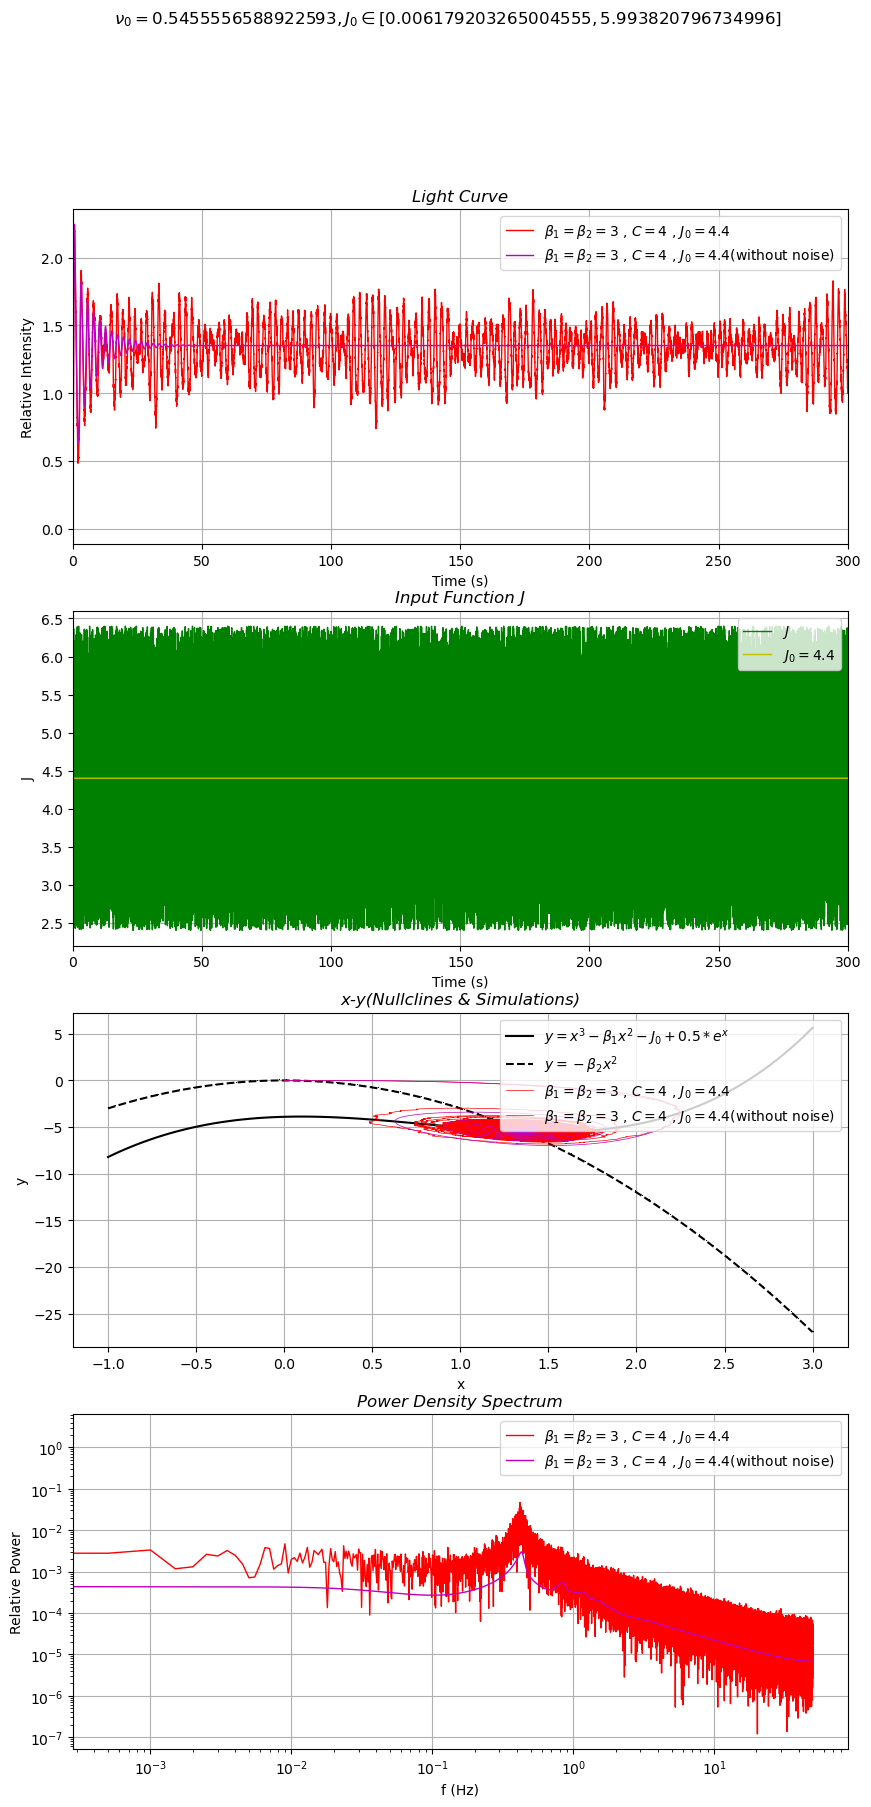

In [2]:
#复现第一篇论文：解MHR模型，通过修改C和J0的值得到不同类型的相对强度、输入参数J、傅里叶变换后的相对强度
#添加e^x,sinx,cosx后仍能产生QPO，这个模型对微扰项有很大的包容性，这说明真实的模型很可能不是作者提出的那样，很可能存在诸多微扰项
#在vx后添加一项-0.5*np.e**x[i]，J0=4.4时可以得到QPO，J0为其他值时可以得到其他类

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

Fs=100#采样频率
dt=1/Fs#采样周期，即相邻两数据点的时间间隔
t_total=2000
n=int(t_total/dt)#信号长度

x=np.zeros(n,dtype=float)
y=np.zeros(n,dtype=float)
vx=np.zeros(n,dtype=float)
vy=np.zeros(n,dtype=float)
t=np.arange(n)*dt

ρ=1
β1=3
β2=β1

C=4
J0=4.4
J=J0+C*(np.random.random(n)-0.5)#构建随机数组J

#计算
for i in range(0,n-1):
    vx[i+1]=-ρ*(x[i]**3)+β1*(x[i]**2)+y[i]+J[i]-0.5*np.e**x[i]
    vy[i+1]=-β2*(x[i]**2)-y[i]
    x[i+1]=x[i]+vx[i+1]*dt
    y[i+1]=y[i]+vy[i+1]*dt

#无噪音的解
x_wn=np.zeros(n,dtype=float)
y_wn=np.zeros(n,dtype=float)
vx_wn=np.zeros(n,dtype=float)
vy_wn=np.zeros(n,dtype=float)
for i in range(0,n-1):
    vx_wn[i+1]=-ρ*(x_wn[i]**3)+β1*(x_wn[i]**2)+y_wn[i]+J0-0.5*np.e**x_wn[i]
    vy_wn[i+1]=-β2*(x_wn[i]**2)-y_wn[i]
    x_wn[i+1]=x_wn[i]+vx_wn[i+1]*dt
    y_wn[i+1]=y_wn[i]+vy_wn[i+1]*dt

#绘图
fig=plt.figure(figsize=(10,20),dpi=100)
ν0=(4/3*β1**2-0.25)**0.5/2/np.pi
J0_low=((β1-(β1**2-3)**0.5)/3)**3
J0_high=((β1+(β1**2-3)**0.5)/3)**3
fig.suptitle(r'$\nu_0=$'+str(ν0)+r'$,J_0 \in$'+r'$[$'+str(J0_low)+r'$,$'+str(J0_high)+r'$]$')

#绘制x的图像，由于数据量较大，只展示前percent
percent=0.15
ax1=fig.add_subplot(4,1,1)
ax1.plot(t[:int(percent*n)],x[:int(percent*n)],'r',lw=1,label=r'$\beta_1=\beta_2=$'+str(β1)+' , '+r'$C=$'+str(C)+' , '+r'$J_0=$'+str(J0))
ax1.plot(t[:int(percent*n)],x_wn[:int(percent*n)],'m',lw=1,label=r'$\beta_1=\beta_2=$'+str(β1)+' , '+r'$C=$'+str(C)+' , '+r'$J_0=$'+str(J0)+r'(without noise)')
ax1.set_title(r'Light Curve',fontstyle='italic')
ax1.set_xlabel(r'Time (s)')
ax1.set_ylabel(r'Relative Intensity')
ax1.set_xlim(0, percent*n*dt)
ax1.legend(loc = 'upper right')
ax1.grid()

#绘制J的图像，由于数据量较大，只展示前percent
ax2=fig.add_subplot(4,1,2)
ax2.plot(t[:int(percent*n)],J[:int(percent*n)],'g',lw=1,label=r'$J$')
ax2.plot(t[:int(percent*n)],np.ones(int(percent*n))*J0,'y',lw=1,label=r'$J_0=$'+str(J0))
ax2.set_title(r'Input Function J',fontstyle='italic')
ax2.set_xlabel(r'Time (s)')
ax2.set_ylabel(r'J')
ax2.set_xlim(0, percent*n*dt)
ax2.legend(loc = 'upper right')
ax2.grid()

#绘制x-y图像
ax3=fig.add_subplot(4,1,3)
x_t=np.linspace(-1,3,100)
y1=ρ*(x_t**3)-β1*(x_t**2)-J0+0.5*np.e**x_t
y2=-β2*(x_t**2)
ax3.plot(x_t,y1,'k',label=r'$y=x^3-\beta_1 x^2-J_0+0.5*e^x$')
ax3.plot(x_t,y2,'k,--',label=r'$y=-\beta_2 x^2$')
persent_xy=0.1
ax3.plot(x[:int(persent_xy*n)],y[:int(persent_xy*n)],'r',lw=0.5,label=r'$\beta_1=\beta_2=$'+str(β1)+' , '+r'$C=$'+str(C)+' , '+r'$J_0=$'+str(J0))
ax3.plot(x_wn[:int(persent_xy*n)],y_wn[:int(persent_xy*n)],'m',lw=0.5,label=r'$\beta_1=\beta_2=$'+str(β1)+' , '+r'$C=$'+str(C)+' , '+r'$J_0=$'+str(J0)+r'(without noise)')
ax3.set_title(r'x-y(Nullclines & Simulations)',fontstyle='italic')
ax3.set_xlabel(r'x')
ax3.set_ylabel(r'y')
ax3.legend(loc = 'upper right')
ax3.grid()

#x的傅里叶变换,双侧频谱
ax4=fig.add_subplot(4,1,4)
ax4.plot(np.arange(int(n/2))*Fs/n,2*np.abs(fft(x))[:int(n/2)]/n,'r',lw=1,label=r'$\beta_1=\beta_2=$'+str(β1)+' , '+r'$C=$'+str(C)+' , '+r'$J_0=$'+str(J0)) 
ax4.plot(np.arange(int(n/2))*Fs/n,2*np.abs(fft(x_wn))[:int(n/2)]/n,'m',lw=1,label=r'$\beta_1=\beta_2=$'+str(β1)+' , '+r'$C=$'+str(C)+' , '+r'$J_0=$'+str(J0)+r'(without noise)') 
ax4.set_title(r'Power Density Spectrum',fontstyle='italic')
ax4.set_xlabel(r'f (Hz)')
ax4.set_ylabel(r'Relative Power')
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.legend(loc = 'upper right')
ax4.grid()

#plt.show()
#plt.savefig('β1='+str(β1)+',β2='+str(β2)+',C='+str(C)+',J0='+str(J0)+'.png')

In [6]:
import numpy as np
np.arctan(6.5)

1.4181469983996315

In [5]:
import numpy as np
np.arctan(219)

1.5662301484844146